In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
import warnings
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_excel(r"C:\Users\PC\Desktop\Case_Study_Multinet.xlsx")

In [3]:
##################################
# GENERAL REVIEW
##################################

In [4]:
"""
Veri setini değerlendirmek amacıyla belirli parametreler ile inceliyoruz.
"""

'\nVeri setini değerlendirmek amacıyla belirli parametreler ile inceliyoruz.\n'

In [5]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    
check_df(df)

##################### Shape #####################
(24853, 25)
##################### Types #####################
Unnamed: 0                          float64
Yıl                                   int64
Ay                                   object
Müşteri Kodu                          int64
Son müşteri Statusu                  object
Bölge                                object
Ciro                                float64
Kart Sayısı                           int64
Kart Başı Ciro                       object
Hizmet Bedeli Oranı                  object
Hizmet Bedeli Beklenti Tutarı        object
Sözleşme Vadesi                     float64
İl                                   object
Hangi Rakipten Kazanıldı             object
Müşteri Alt Sektör                   object
Son SiparişTarihi                    object
KartGrp                              object
Segment                              object
self_servis kullanım oranı          float64
Sozlesmebitengunsayisi              float64
Ziyaret_

In [6]:
df["KartGrp"].unique()

array(['0-15', '16-75', '76-200', '201-400', '401-1000', '1001-5000',
       '5000+'], dtype=object)

In [7]:
"""
Veri ön işleme adımlarını gerçekleştirebilmek amacıyla bazı değişkenlerimiz dtype'ını değiştiriyoruz.
"""

"\nVeri ön işleme adımlarını gerçekleştirebilmek amacıyla bazı değişkenlerimiz dtype'ını değiştiriyoruz.\n"

In [8]:
df["Yıl"] = df["Yıl"].astype('object')
df["Müşteri Kodu"] = df["Müşteri Kodu"].astype('object')
df["Kart Başı Ciro"] = pd.to_numeric(df["Kart Başı Ciro"], errors='coerce')
df["Hizmet Bedeli Beklenti Tutarı"] = pd.to_numeric(df["Hizmet Bedeli Beklenti Tutarı"], errors='coerce')
df['Son SiparişTarihi'] = pd.to_datetime(df['Son SiparişTarihi'],errors = 'coerce')
df["Son_6_aydaki_kart_sayisi_degisim"] = pd.to_numeric(df["Son_6_aydaki_kart_sayisi_degisim"], errors='coerce')
df["KartGrp"] = df["KartGrp"].astype('object')


In [9]:
df["Hizmet Bedeli Oranı"] = df["Hizmet Bedeli Oranı"].str.replace("%", "")
df["Hizmet Bedeli Oranı"] = pd.to_numeric(df["Hizmet Bedeli Oranı"], errors='coerce')

In [10]:
df["Hizmet Bedeli Oranı"] = df["Hizmet Bedeli Oranı"].apply(lambda x: "{}%".format(x))

In [11]:
df["Hizmet Bedeli Oranı"].unique()

array(['nan%', '3.0%', '2.0%', '1.0%', '0.0%', '1.5%', '2.5%', '2.6%'],
      dtype=object)

In [12]:
df = df.replace({"Hizmet Bedeli Oranı": {"nan%": np.nan}})

In [13]:
df = df.drop(['Unnamed: 0'], axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24853 entries, 0 to 24852
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Yıl                               24853 non-null  object        
 1   Ay                                24853 non-null  object        
 2   Müşteri Kodu                      24853 non-null  object        
 3   Son müşteri Statusu               24853 non-null  object        
 4   Bölge                             24853 non-null  object        
 5   Ciro                              24853 non-null  float64       
 6   Kart Sayısı                       24853 non-null  int64         
 7   Kart Başı Ciro                    24628 non-null  float64       
 8   Hizmet Bedeli Oranı               1871 non-null   object        
 9   Hizmet Bedeli Beklenti Tutarı     1871 non-null   float64       
 10  Sözleşme Vadesi                   24853 non-nu

In [15]:
def grab_col_names(dataframe, cat_th=8, car_th=70):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        dataframe: dataframe
                Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optional
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.

    """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O" or dataframe[col].dtypes == "category"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

cat_cols
num_cols
cat_but_car

Observations: 24853
Variables: 24
cat_cols: 14
num_cols: 9
cat_but_car: 1
num_but_cat: 2


['Müşteri Kodu']

In [16]:
##################################
# ANALYSIS OF CATEGORY VARIABLES
##################################

In [17]:
"""
Kategorik değişkenlerimizi oranlarıyla birlikte inceliyor, analiz ediyoruz.
"""

'\nKategorik değişkenlerimizi oranlarıyla birlikte inceliyor, analiz ediyoruz.\n'

In [18]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("##########################################")
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()


In [19]:
 for col in cat_cols:
        cat_summary(df, col)

        Yıl   Ratio
2019  24853 100.000
##########################################
          Ay  Ratio
Şubat  12560 50.537
Ocak   12293 49.463
##########################################
        Son müşteri Statusu  Ratio
Mevcut                23887 96.113
Kayıp                   966  3.887
##########################################
                  Bölge  Ratio
Tele Satış        18537 74.587
Istanbul Avrupa    1748  7.033
Istanbul Anadolu    911  3.666
Ankara              783  3.151
Antalya             711  2.861
Ozel Musteriler     666  2.680
İzmir               605  2.434
Network             430  1.730
Adana               223  0.897
Bursa               210  0.845
Multinet Grup        16  0.064
Reseller             11  0.044
Bireysel              2  0.008
##########################################
      Hizmet Bedeli Oranı  Ratio
3.0%                 1569  6.313
2.0%                  131  0.527
0.0%                   74  0.298
1.0%                   52  0.209
1.5%                   4

In [20]:
"""
self_servis kullanım oranı değişkeninin içerisindeki "-0.1 ve -0.2" değerlerini eliyoruz. 
Nedeni ise, 0'dan küçük veya 1 den büyük bir oran olamaz. Bunlar noisy datalardır. 
Ayrıyetten veri setimizin yalnızca 0.008'lik bir kısmına denk geldiği için bunları tahmin ile doldurmak analiz sonucumuzu
olumsuz etkileyecektir.
"""

'\nself_servis kullanım oranı değişkeninin içerisindeki "-0.1 ve -0.2" değerlerini eliyoruz. \nNedeni ise, 0\'dan küçük veya 1 den büyük bir oran olamaz. Bunlar noisy datalardır. \nAyrıyetten veri setimizin yalnızca 0.008\'lik bir kısmına denk geldiği için bunları tahmin ile doldurmak analiz sonucumuzu\nolumsuz etkileyecektir.\n'

In [21]:
df = df.loc[~((df["self_servis kullanım oranı"] == -0.1) | (df["self_servis kullanım oranı"] == -0.2))]

In [22]:
"""
Yanlış yazılmış değişken değerlerini düzeltip, tek bir çatı altında topluyoruz.
"""


'\nYanlış yazılmış değişken değerlerini düzeltip, tek bir çatı altında topluyoruz.\n'

In [23]:
df["Segment"] = df["Segment"].str.replace("BÜYÜK MÜŞTERİLER","Büyük Müşteriler")
df["Segment"] = df["Segment"].str.replace("KOBİ","Kobi")



In [24]:
 for col in cat_cols:
        cat_summary(df, col)

        Yıl   Ratio
2019  24849 100.000
##########################################
          Ay  Ratio
Şubat  12560 50.545
Ocak   12289 49.455
##########################################
        Son müşteri Statusu  Ratio
Mevcut                23885 96.121
Kayıp                   964  3.879
##########################################
                  Bölge  Ratio
Tele Satış        18537 74.599
Istanbul Avrupa    1748  7.034
Istanbul Anadolu    911  3.666
Ankara              781  3.143
Antalya             709  2.853
Ozel Musteriler     666  2.680
İzmir               605  2.435
Network             430  1.730
Adana               223  0.897
Bursa               210  0.845
Multinet Grup        16  0.064
Reseller             11  0.044
Bireysel              2  0.008
##########################################
      Hizmet Bedeli Oranı  Ratio
3.0%                 1569  6.314
2.0%                  131  0.527
0.0%                   74  0.298
1.0%                   52  0.209
1.5%                   4

In [25]:
"""
"Hizmet Bedeli Oranı" değişkenindeki %2.5 ve %2.6'lık değerlerin çok düşük frekanslarda bulunduğu için Noisy Data olduğuna
karar verdim. 
Fakat sektörel bilgimin çok yüksek olmaması ve bu oranların gerçek olup olmayacağından çok emin olmadığım için bu aşamada 
drop etmiyorum. İlerleyen kısımlarda bu ve benzeri değerler için Rare Analysis gerçekleştireceğim.
"""

'\n"Hizmet Bedeli Oranı" değişkenindeki %2.5 ve %2.6\'lık değerlerin çok düşük frekanslarda bulunduğu için Noisy Data olduğuna\nkarar verdim. \nFakat sektörel bilgimin çok yüksek olmaması ve bu oranların gerçek olup olmayacağından çok emin olmadığım için bu aşamada \ndrop etmiyorum. İlerleyen kısımlarda bu ve benzeri değerler için Rare Analysis gerçekleştireceğim.\n'

In [26]:
##################################
# ANALYSIS OF NUMERICAL VARIABLES
##################################

In [27]:
"""
Nümerik değişkenlerimizi belli parametrelerde analiz ediyoruz.
"""

'\nNümerik değişkenlerimizi belli parametrelerde analiz ediyoruz.\n'

In [28]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

count     24849.000
mean       9798.608
std       90454.828
min       -9537.040
5%          370.370
10%         555.560
20%         916.670
30%        1259.260
40%        1666.670
50%        2222.220
60%        3009.260
70%        4305.560
80%        6649.826
90%       12841.846
95%       24565.744
99%      114589.516
max     5240139.840
Name: Ciro, dtype: float64


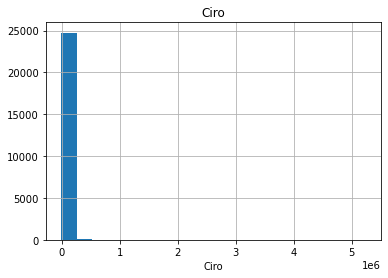

count   24849.000
mean       29.607
std       332.884
min         0.000
5%          1.000
10%         2.000
20%         3.000
30%         4.000
40%         5.000
50%         6.000
60%         9.000
70%        12.000
80%        18.000
90%        35.000
95%        68.000
99%       352.000
max     22826.000
Name: Kart Sayısı, dtype: float64


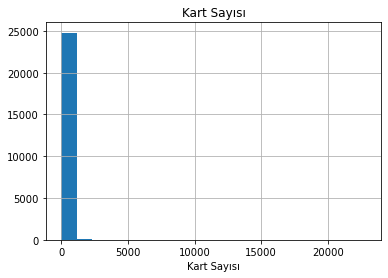

count    24624.000
mean       402.307
std       2068.605
min       -953.704
5%         185.185
10%        217.593
20%        259.260
30%        281.012
40%        319.366
50%        345.135
60%        370.370
70%        401.852
80%        446.226
90%        517.429
95%        648.147
99%        990.167
max     238374.620
Name: Kart Başı Ciro, dtype: float64


count   1871.000
mean      82.970
std      244.470
min      -23.333
5%         5.556
10%       11.111
20%       20.833
30%       28.750
40%       38.889
50%       46.667
60%       56.389
70%       73.333
80%       94.620
90%      146.945
95%      222.261
99%      727.021
max     8962.079
Name: Hizmet Bedeli Beklenti Tutarı, dtype: float64


count   24849.000
mean        5.371
std         9.930
min         0.000
5%          0.000
10%         0.000
20%         0.000
30%         0.000
40%         0.000
50%         0.000
60%         0.000
70%         0.000
80%        15.000
90%        25.000
95%        25.000
99%        30.000
max        30.000
Name: Sözleşme Vadesi, dtype: float64


count                   20840
unique                     83
top       2019-01-03 00:00:00
freq                     4826
first     2018-02-11 00:00:00
last      2019-12-03 00:00:00
Name: Son SiparişTarihi, dtype: object


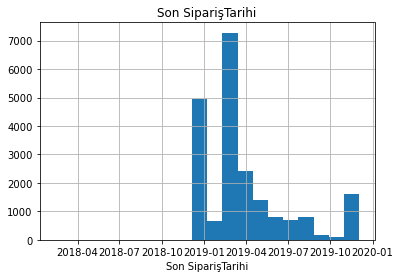

count    658.000
mean      25.919
std      157.028
min     -287.917
5%      -236.917
10%     -200.917
20%     -136.917
30%      -36.000
40%       18.000
50%       35.000
60%       42.958
70%       59.958
80%      164.000
90%      268.013
95%      292.800
99%      310.000
max      310.000
Name: Sozlesmebitengunsayisi, dtype: float64


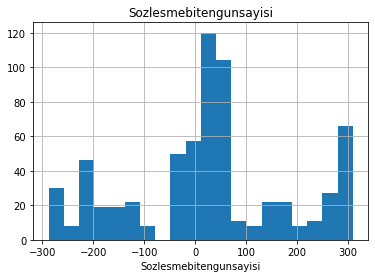

count   251.000
mean      0.024
std       0.761
min      -0.630
5%       -0.630
10%      -0.630
20%      -0.630
30%      -0.630
40%      -0.259
50%       0.000
60%       0.000
70%       0.111
80%       0.481
90%       1.222
95%       1.222
99%       2.704
max       2.704
Name: Ziyaret_ort_sapma, dtype: float64


count   595.000
mean      0.464
std       2.418
min      -1.000
5%       -0.091
10%      -0.060
20%      -0.022
30%      -0.015
40%       0.000
50%       0.004
60%       0.010
70%       0.024
80%       0.038
90%       0.367
95%       0.936
99%      17.090
max      17.090
Name: Son_6_aydaki_kart_sayisi_degisim, dtype: float64


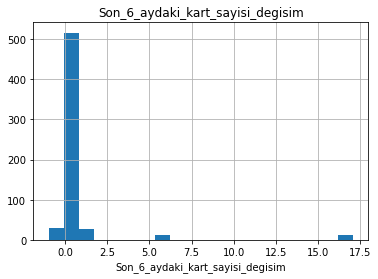

In [29]:
for col in num_cols:
    num_summary(df, col, plot=True)

In [30]:
"""
Nümerik ve kategorik değişkenlerimizin bağımlı değişkenle olan ilişkisini incelemek adına Son Müşteri Statüsü değişkenimizi
1 ve 0 olarak değiştiriyoruz.
"""

'\nNümerik ve kategorik değişkenlerimizin bağımlı değişkenle olan ilişkisini incelemek adına Son Müşteri Statüsü değişkenimizi\n1 ve 0 olarak değiştiriyoruz.\n'

In [31]:
df["Son müşteri Statusu"] = df["Son müşteri Statusu"].apply(lambda x : 1 if x == "Mevcut" else 0)

In [32]:
##################################
# ANALYSIS OF NUMERICAL VARIABLES ACCORDING TO TARGET
##################################

In [33]:
"""
Nümerik değişkenlerin bağımlı değişken ile olan ilişkisini inceliyoruz.
"""

'\nNümerik değişkenlerin bağımlı değişken ile olan ilişkisini inceliyoruz.\n'

In [34]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")

In [35]:
for col in num_cols:
    target_summary_with_num(df, "Son müşteri Statusu", col)

                         Ciro
Son müşteri Statusu          
0                   14592.778
1                    9605.115


                     Kart Sayısı
Son müşteri Statusu             
0                         44.158
1                         29.020


                     Kart Başı Ciro
Son müşteri Statusu                
0                           406.040
1                           402.156


                     Hizmet Bedeli Beklenti Tutarı
Son müşteri Statusu                               
0                                          136.405
1                                           82.596


                     Sözleşme Vadesi
Son müşteri Statusu                 
0                             12.314
1                              5.091


                                Son SiparişTarihi
Son müşteri Statusu                              
0                   2019-04-18 17:51:15.496688896
1                   2019-03-28 01:33:15.585432064


                     Sozlesmebitengunsay

In [36]:
##################################
# ANALYSIS OF CATEGORIAL VARIABLES ACCORDING TO TARGET
##################################

In [37]:
"""
Kategorik değişkenlerin bağımlı değişken ile olan ilişkisini inceliyoruz.
"""

'\nKategorik değişkenlerin bağımlı değişken ile olan ilişkisini inceliyoruz.\n'

In [38]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")

In [39]:
for col in cat_cols:
    target_summary_with_cat(df, "Son müşteri Statusu", col)

Yıl
      TARGET_MEAN  Count   Ratio
2019        0.961  24849 100.000


Ay
       TARGET_MEAN  Count  Ratio
Ocak         0.959  12289 49.455
Şubat        0.963  12560 50.545


Son müşteri Statusu
   TARGET_MEAN  Count  Ratio
0        0.000    964  3.879
1        1.000  23885 96.121


Bölge
                  TARGET_MEAN  Count  Ratio
Adana                   0.085    223  0.897
Ankara                  0.067    781  3.143
Antalya                 0.956    709  2.853
Bireysel                1.000      2  0.008
Bursa                   1.000    210  0.845
Istanbul Anadolu        1.000    911  3.666
Istanbul Avrupa         1.000   1748  7.034
Multinet Grup           1.000     16  0.064
Network                 1.000    430  1.730
Ozel Musteriler         1.000    666  2.680
Reseller                1.000     11  0.044
Tele Satış              1.000  18537 74.599
İzmir                   1.000    605  2.435


Hizmet Bedeli Oranı
      TARGET_MEAN  Count  Ratio
0.0%        1.000     74  0.298
1.0%   

In [40]:
##################################
# CORRELATION
##################################

In [41]:
"""
İleride yapacağımız işlemlerde bilgi sahibi olmak için değişkenlerimizin korelasyonlarını analiz ediyoruz.
"""

'\nİleride yapacağımız işlemlerde bilgi sahibi olmak için değişkenlerimizin korelasyonlarını analiz ediyoruz.\n'

In [42]:
df[num_cols].corr()

Ciro  Kart Sayısı  Kart Başı Ciro  Hizmet Bedeli Beklenti Tutarı  Sözleşme Vadesi  Sozlesmebitengunsayisi  Ziyaret_ort_sapma  \
Ciro                              1.000        0.970           0.033                          0.181            0.144                   0.029             -0.053   
Kart Sayısı                       0.970        1.000          -0.003                          0.186            0.121                   0.011             -0.022   
Kart Başı Ciro                    0.033       -0.003           1.000                          0.039            0.022                   0.022             -0.054   
Hizmet Bedeli Beklenti Tutarı     0.181        0.186           0.039                          1.000            0.126                  -0.055              0.869   
Sözleşme Vadesi                   0.144        0.121           0.022                          0.126            1.000                   0.009              0.110   
Sozlesmebitengunsayisi            0.029        0.011           0.022                         -0.055            0.009                   1.000             -0.106   
Ziyaret_ort_sapma                -0.053       -0.022          -0.054                          0.869            0.110                  -0.106              1.000   
Son_6_aydaki_kart_sayisi_degisim  0.097        0.092          -0.016                          0.017            0.042                   0.258              0.023   

                                  Son_6_aydaki_kart_sayisi_degisim  
Ciro                                                         0.097  
Kart Sayısı                                                  0.092  
Kart Başı Ciro                                              -0.016  
Hizmet Bedeli Beklenti Tutarı                                0.017  
Sözleşme Vadesi                                              0.042  
Sozlesmebitengunsayisi                                       0.258  
Ziyaret_ort_sapma                                            0.023  
Son_6_aydaki_kart_sayisi_degisim                             1.000

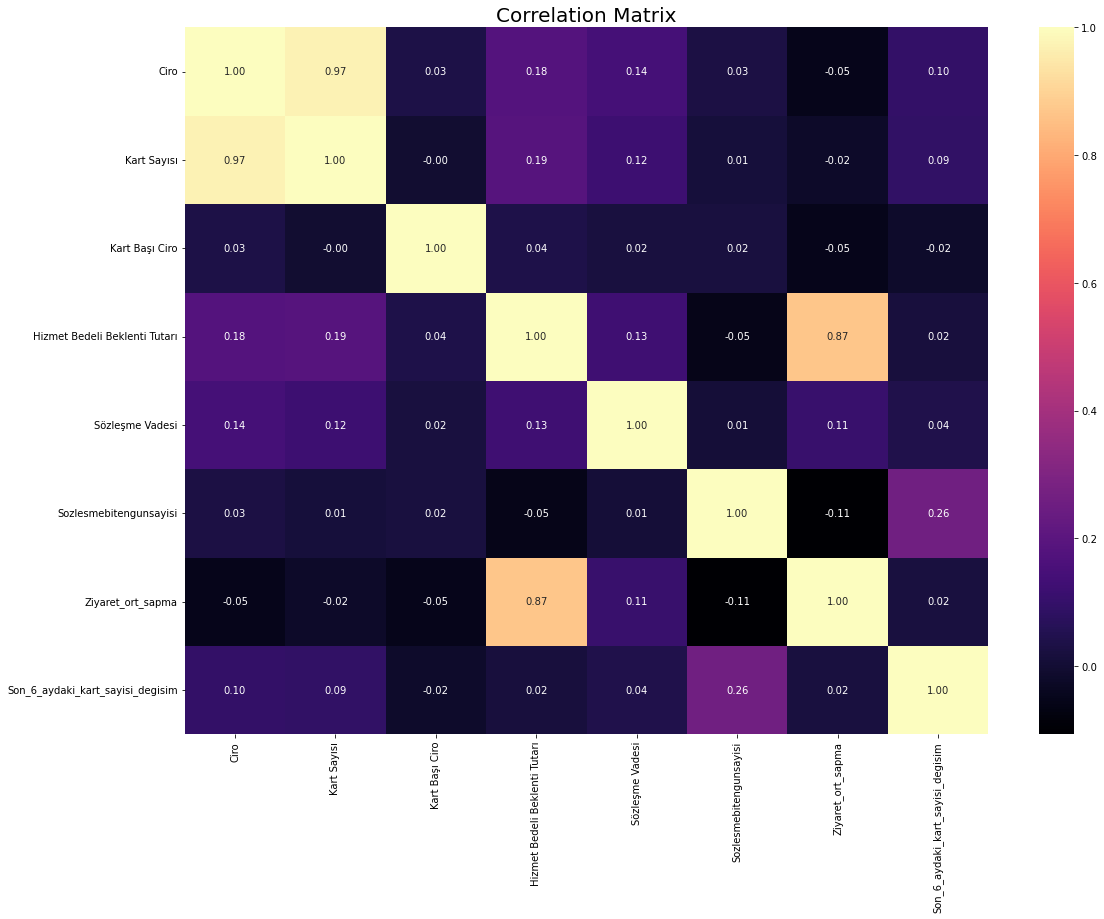

In [43]:
f, ax = plt.subplots(figsize=[18, 13])
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap="magma")
ax.set_title("Correlation Matrix", fontsize=20)
plt.show(block=True)

In [44]:
df.corrwith(df["Son müşteri Statusu"]).sort_values(ascending=False)

Son müşteri Statusu                 1.000
Son_6_aydaki_kart_sayisi_degisim    0.017
Sozlesmebitengunsayisi              0.017
Kart Başı Ciro                     -0.000
Kart Sayısı                        -0.009
Ciro                               -0.011
Hizmet Bedeli Beklenti Tutarı      -0.018
self_servis kullanım oranı         -0.028
Ziyaret_ort_sapma                  -0.030
Sözleşme Vadesi                    -0.140
Sikayet_adedi_orani                -0.169
dtype: float64

In [45]:
##################################
# MISSING VALUE ANALYSIS
##################################

In [46]:
"""
Eksik değer içeren değişkenlerimizi table, bar, heatmap gibi yöntemlerle analiz ediyoruz.
"""

'\nEksik değer içeren değişkenlerimizi table, bar, heatmap gibi yöntemlerle analiz ediyoruz.\n'

In [47]:
df.isnull().sum()

Yıl                                     0
Ay                                      0
Müşteri Kodu                            0
Son müşteri Statusu                     0
Bölge                                   0
Ciro                                    0
Kart Sayısı                             0
Kart Başı Ciro                        225
Hizmet Bedeli Oranı                 22978
Hizmet Bedeli Beklenti Tutarı       22978
Sözleşme Vadesi                         0
İl                                      0
Hangi Rakipten Kazanıldı                0
Müşteri Alt Sektör                      0
Son SiparişTarihi                    4009
KartGrp                                 0
Segment                                 0
self_servis kullanım oranı          24128
Sozlesmebitengunsayisi              24191
Ziyaret_ort_sapma                   24598
Sikayet_adedi_orani                     0
Son_6_aydaki_kart_sayisi_degisim    24254
Çalışma Tipi                            0
Ödeme Tipi                        

In [48]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns


missing_values_table(df)

                                  n_miss  ratio
Ziyaret_ort_sapma                  24598 98.990
Son_6_aydaki_kart_sayisi_degisim   24254 97.610
Sozlesmebitengunsayisi             24191 97.350
self_servis kullanım oranı         24128 97.100
Hizmet Bedeli Oranı                22978 92.470
Hizmet Bedeli Beklenti Tutarı      22978 92.470
Son SiparişTarihi                   4009 16.130
Kart Başı Ciro                       225  0.910


In [49]:
msno.bar(df)
plt.show()

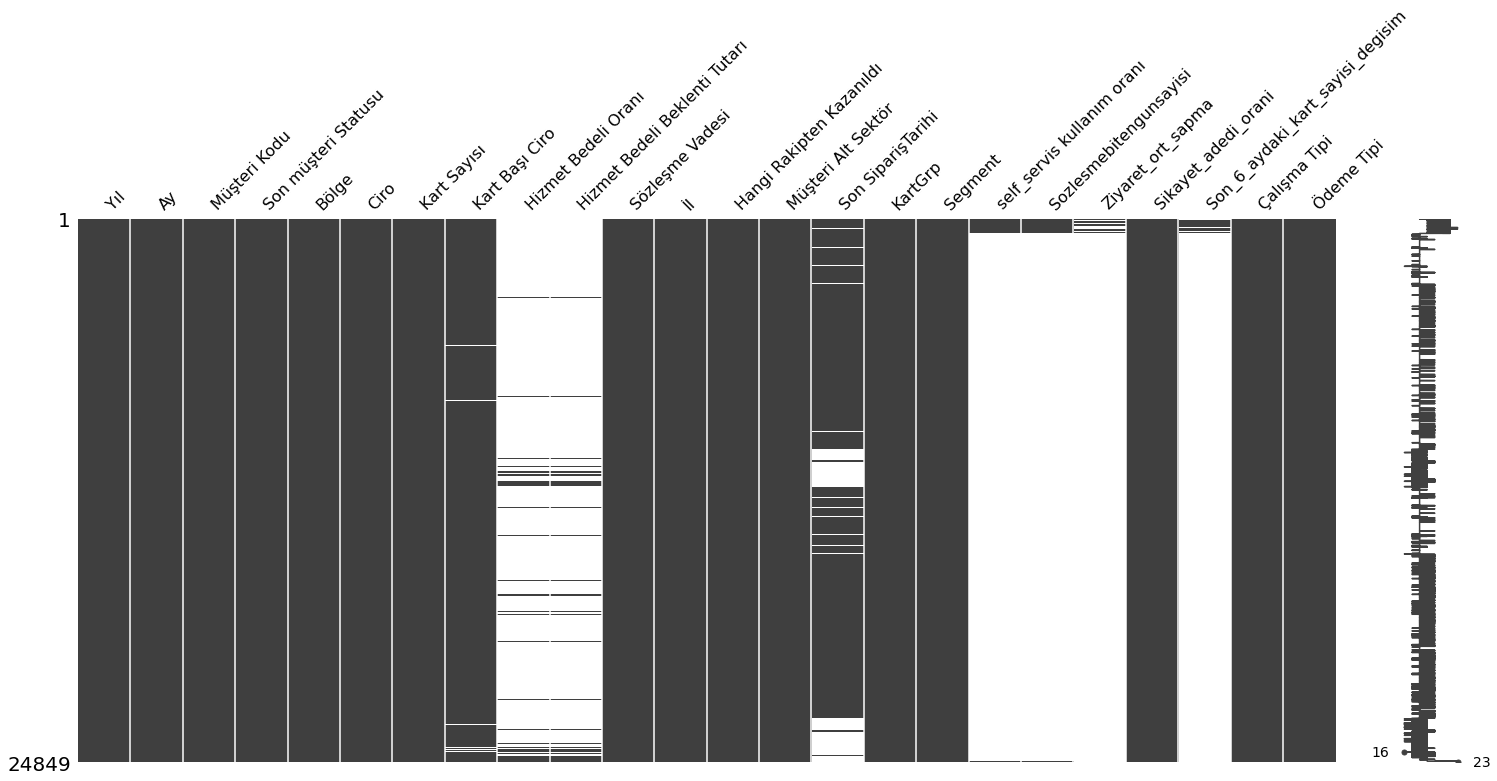

In [50]:
msno.matrix(df)
plt.show()

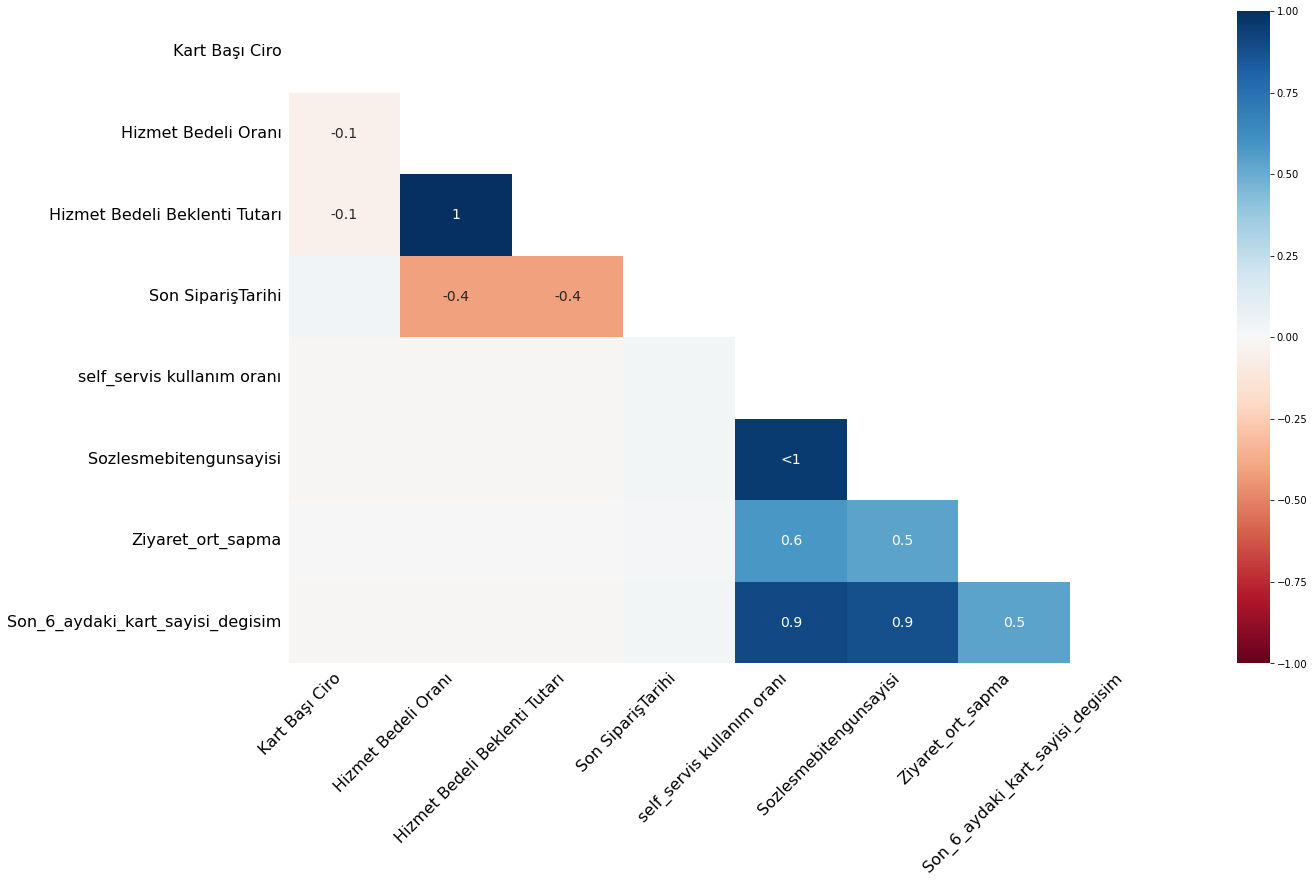

In [51]:
msno.heatmap(df)
plt.show()

In [52]:
na_cols = missing_values_table(df, True)


def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("NA")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")


missing_vs_target(df, "Son müşteri Statusu", na_cols)

                                  n_miss  ratio
Ziyaret_ort_sapma                  24598 98.990
Son_6_aydaki_kart_sayisi_degisim   24254 97.610
Sozlesmebitengunsayisi             24191 97.350
self_servis kullanım oranı         24128 97.100
Hizmet Bedeli Oranı                22978 92.470
Hizmet Bedeli Beklenti Tutarı      22978 92.470
Son SiparişTarihi                   4009 16.130
Kart Başı Ciro                       225  0.910
                        TARGET_MEAN  Count
Kart Başı Ciro_NA_FLAG                    
0                             0.961  24624
1                             0.960    225


                             TARGET_MEAN  Count
Hizmet Bedeli Oranı_NA_FLAG                    
0                                  0.993   1871
1                                  0.959  22978


                                       TARGET_MEAN  Count
Hizmet Bedeli Beklenti Tutarı_NA_FLAG                    
0                                            0.993   1871
1                         

In [53]:
"""
Kart sayısı 0 olan müşterilerin Kart başına bir ciro değeri olamayacağı için ve Kart Başı Ciro değerlerini hesaplayabilmek 
adına Kart başı ciro değerlerine 0 getirdik.
"""

'\nKart sayısı 0 olan müşterilerin Kart başına bir ciro değeri olamayacağı için ve Kart Başı Ciro değerlerini hesaplayabilmek \nadına Kart başı ciro değerlerine 0 getirdik.\n'

In [54]:
df.loc[df['Kart Sayısı'] == 0, 'Kart Başı Ciro'] = 0

In [55]:
df['Kart_Basi_Ciro_missing'] = df['Ciro'] / df['Kart Sayısı']

In [56]:
df['Kart Başı Ciro'].fillna(df['Kart_Basi_Ciro_missing'], inplace=True)

In [57]:
df.drop(['Kart_Basi_Ciro_missing'], axis=1, inplace=True)

In [58]:
df.dropna(subset=['Kart Başı Ciro'], inplace=True)

In [59]:
"""
Hizmet Bedeli Oranı %2.5 ve %2.6 olan verileri veri setimizden çıkartıyoruz. Çünkü Hizmet bedeli oranı %2.5 olan yalnızca 3
değer, %2.6 olan yalnızca 1 değer var. Noisy data olma ihtimali çok kuvvetli. Aynı zamanda çok küçük bir grubu temsil ettikleri
için model sonucuna bir etkide bulunmayacaklardır.
"""

df = df[~df["Hizmet Bedeli Oranı"].isin(["2.5%", "2.6%"])]

In [60]:
df.isnull().sum()

Yıl                                     0
Ay                                      0
Müşteri Kodu                            0
Son müşteri Statusu                     0
Bölge                                   0
Ciro                                    0
Kart Sayısı                             0
Kart Başı Ciro                          0
Hizmet Bedeli Oranı                 22978
Hizmet Bedeli Beklenti Tutarı       22978
Sözleşme Vadesi                         0
İl                                      0
Hangi Rakipten Kazanıldı                0
Müşteri Alt Sektör                      0
Son SiparişTarihi                    4008
KartGrp                                 0
Segment                                 0
self_servis kullanım oranı          24124
Sozlesmebitengunsayisi              24187
Ziyaret_ort_sapma                   24594
Sikayet_adedi_orani                     0
Son_6_aydaki_kart_sayisi_degisim    24250
Çalışma Tipi                            0
Ödeme Tipi                        

In [61]:
"""
Eksik değerleri doldurma işlemlerine geçmeden önce yöntemi belirlemek için 
eksik değer içeren değişkenin diğer değişkenlerle olan ilişkilerini analiz ediyoruz.
"""

'\nEksik değerleri doldurma işlemlerine geçmeden önce yöntemi belirlemek için \neksik değer içeren değişkenin diğer değişkenlerle olan ilişkilerini analiz ediyoruz.\n'

In [62]:
for col in num_cols:
    target_summary_with_num(df, "Hizmet Bedeli Oranı", col)

                         Ciro
Hizmet Bedeli Oranı          
0.0%                20460.811
1.0%                10474.897
1.5%                 5087.717
2.0%                 5245.979
3.0%                 2124.342


                     Kart Sayısı
Hizmet Bedeli Oranı             
0.0%                      57.689
1.0%                      23.673
1.5%                      15.366
2.0%                      13.427
3.0%                       5.688


                     Kart Başı Ciro
Hizmet Bedeli Oranı                
0.0%                        483.340
1.0%                        488.159
1.5%                        373.805
2.0%                        373.956
3.0%                        386.713


                     Hizmet Bedeli Beklenti Tutarı
Hizmet Bedeli Oranı                               
0.0%                                         0.000
1.0%                                       104.749
1.5%                                       763.158
2.0%                                       104

In [63]:
"""
Yaptığımız analiz sonucunda Hizmet Bedeli Oranının Ciro, Kart Sayısı ve Sözleşme vadesi değişkenleriyle doğrudan bir ilişkisi
olduğunu tespit ettik. Şimdi bu değişkenleri kullanarak Random Forest ile eksik değerleri dolduruyoruz.
"""

'\nYaptığımız analiz sonucunda Hizmet Bedeli Oranının Ciro, Kart Sayısı ve Sözleşme vadesi değişkenleriyle doğrudan bir ilişkisi\nolduğunu tespit ettik. Şimdi bu değişkenleri kullanarak Random Forest ile eksik değerleri dolduruyoruz.\n'

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

In [65]:
df['Hizmet Bedeli Oranı'] = df['Hizmet Bedeli Oranı'].str.strip('%').astype(float)
df_without_nan = df.dropna(subset=['Hizmet Bedeli Oranı'])
X = df_without_nan[['Ciro', 'Kart Sayısı', 'Sözleşme Vadesi']].values
y = df_without_nan['Hizmet Bedeli Oranı'].values

In [66]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Make predictions
y_pred = rf.predict(X)

# Model evaluation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# predict Hizmet Bedeli Oranı for the rows with NaN values
X_missing = df[np.isnan(df['Hizmet Bedeli Oranı'])][['Ciro', 'Kart Sayısı', 'Sözleşme Vadesi']].values
predictions = rf.predict(X_missing)

# fill NaN values with the predicted values
df.loc[np.isnan(df['Hizmet Bedeli Oranı']), 'Hizmet Bedeli Oranı'] = predictions

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared (R2 ): {:.2f}".format(r2))

Mean Squared Error (MSE): 0.15
R-squared (R2 ): 0.71


In [67]:
df.isnull().sum()

Yıl                                     0
Ay                                      0
Müşteri Kodu                            0
Son müşteri Statusu                     0
Bölge                                   0
Ciro                                    0
Kart Sayısı                             0
Kart Başı Ciro                          0
Hizmet Bedeli Oranı                     0
Hizmet Bedeli Beklenti Tutarı       22978
Sözleşme Vadesi                         0
İl                                      0
Hangi Rakipten Kazanıldı                0
Müşteri Alt Sektör                      0
Son SiparişTarihi                    4008
KartGrp                                 0
Segment                                 0
self_servis kullanım oranı          24124
Sozlesmebitengunsayisi              24187
Ziyaret_ort_sapma                   24594
Sikayet_adedi_orani                     0
Son_6_aydaki_kart_sayisi_degisim    24250
Çalışma Tipi                            0
Ödeme Tipi                        

In [68]:
df["Hizmet Bedeli Oranı"].unique()

array([2.64      , 2.73      , 2.72      , ..., 2.73666667, 2.9625    ,
       1.4375    ])

In [69]:
"""
Yaptığımız analizlerde "Hizmet Bedeli Oranı" değişkenimizin %0, %1, %1,5, %2 ve %3 değerlerini aldığını gördük. Eksik değerleri
Random Forest yöntemi ile tahminlediğimiz için eksik değerler float olarak tahmin edildi ve dolduruldu. 
Şimdi doldurduğumuz eksik değerleri belirli koşullarla olması gereken alt sınıflara yuvarlıyoruz.
"""

'\nYaptığımız analizlerde "Hizmet Bedeli Oranı" değişkenimizin %0, %1, %1,5, %2 ve %3 değerlerini aldığını gördük. Eksik değerleri\nRandom Forest yöntemi ile tahminlediğimiz için eksik değerler float olarak tahmin edildi ve dolduruldu. \nŞimdi doldurduğumuz eksik değerleri belirli koşullarla olması gereken alt sınıflara yuvarlıyoruz.\n'

In [70]:
for i, val in enumerate(predictions):
    if val < 0.5:
        predictions[i] = 0
    elif val < 1.5:
        predictions[i] = 1
    elif val < 2:
        predictions[i] = 1.5
    elif val < 2.5:
        predictions[i] = 2
    else:
        predictions[i] = 3

# Find the index of NaN values
nan_index = np.where(np.isnan(df['Hizmet Bedeli Oranı']))[0]

# Assign the predicted values to the corresponding index
for i, index in enumerate(nan_index):
    df.loc[index, 'Hizmet Bedeli Oranı'] = predictions[i]

In [71]:
df['Hizmet Bedeli Oranı'] = df['Hizmet Bedeli Oranı'].round(1)
df['Hizmet Bedeli Oranı'] = df['Hizmet Bedeli Oranı'].astype(float)
df['Hizmet Bedeli Oranı'] = df['Hizmet Bedeli Oranı'].round(1)
df['Hizmet Bedeli Oranı'] = np.where(df['Hizmet Bedeli Oranı'] < 0.5, 0, df['Hizmet Bedeli Oranı'])
df['Hizmet Bedeli Oranı'] = np.where((df['Hizmet Bedeli Oranı'] >= 0.5) & (df['Hizmet Bedeli Oranı'] < 1.5), 1, df['Hizmet Bedeli Oranı'])
df['Hizmet Bedeli Oranı'] = np.where((df['Hizmet Bedeli Oranı'] >= 1.5) & (df['Hizmet Bedeli Oranı'] < 2.0), 1.5, df['Hizmet Bedeli Oranı'])
df['Hizmet Bedeli Oranı'] = np.where((df['Hizmet Bedeli Oranı'] >= 2.0) & (df['Hizmet Bedeli Oranı'] < 2.5), 2.0, df['Hizmet Bedeli Oranı'])
df['Hizmet Bedeli Oranı'] = np.where(df['Hizmet Bedeli Oranı'] >= 2.5, 3, df['Hizmet Bedeli Oranı'])

In [72]:
df["Hizmet Bedeli Oranı"].unique()

array([3. , 1. , 1.5, 2. , 0. ])

In [73]:
df.isnull().sum()

Yıl                                     0
Ay                                      0
Müşteri Kodu                            0
Son müşteri Statusu                     0
Bölge                                   0
Ciro                                    0
Kart Sayısı                             0
Kart Başı Ciro                          0
Hizmet Bedeli Oranı                     0
Hizmet Bedeli Beklenti Tutarı       22978
Sözleşme Vadesi                         0
İl                                      0
Hangi Rakipten Kazanıldı                0
Müşteri Alt Sektör                      0
Son SiparişTarihi                    4008
KartGrp                                 0
Segment                                 0
self_servis kullanım oranı          24124
Sozlesmebitengunsayisi              24187
Ziyaret_ort_sapma                   24594
Sikayet_adedi_orani                     0
Son_6_aydaki_kart_sayisi_degisim    24250
Çalışma Tipi                            0
Ödeme Tipi                        

In [74]:
"""
Hizmet Bedeli Beklenti Tutarı değişkeni Ciro / Hizmet Bedeli Oranı olarak hesaplanıyor. Az önce tahmin ettiğimiz Hizmet Bedeli
Oranlarını kullanarak Hizmet Bedeli Beklenti Tutarı değişkenindeki boş değerleri dolduruyoruz.
"""

'\nHizmet Bedeli Beklenti Tutarı değişkeni Ciro / Hizmet Bedeli Oranı olarak hesaplanıyor. Az önce tahmin ettiğimiz Hizmet Bedeli\nOranlarını kullanarak Hizmet Bedeli Beklenti Tutarı değişkenindeki boş değerleri dolduruyoruz.\n'

In [75]:
df['Hizmet_Bedeli_Beklenti_Tutarı'] = df['Ciro'] / (df['Hizmet Bedeli Oranı'] / 100)

In [76]:
df['Hizmet Bedeli Beklenti Tutarı'].fillna(df['Hizmet_Bedeli_Beklenti_Tutarı'], inplace=True)

In [77]:
df.drop(['Hizmet_Bedeli_Beklenti_Tutarı'], axis=1, inplace=True)

In [78]:
df["Hizmet Bedeli Beklenti Tutarı"].unique()

array([ 111111.33333333,   71759.33333333,  107253.        , ...,
        257778.        , 2302777.        ,  184491.        ])

In [79]:
df.isnull().sum()

Yıl                                     0
Ay                                      0
Müşteri Kodu                            0
Son müşteri Statusu                     0
Bölge                                   0
Ciro                                    0
Kart Sayısı                             0
Kart Başı Ciro                          0
Hizmet Bedeli Oranı                     0
Hizmet Bedeli Beklenti Tutarı           0
Sözleşme Vadesi                         0
İl                                      0
Hangi Rakipten Kazanıldı                0
Müşteri Alt Sektör                      0
Son SiparişTarihi                    4008
KartGrp                                 0
Segment                                 0
self_servis kullanım oranı          24124
Sozlesmebitengunsayisi              24187
Ziyaret_ort_sapma                   24594
Sikayet_adedi_orani                     0
Son_6_aydaki_kart_sayisi_degisim    24250
Çalışma Tipi                            0
Ödeme Tipi                        

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24845 entries, 0 to 24852
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Yıl                               24845 non-null  object        
 1   Ay                                24845 non-null  object        
 2   Müşteri Kodu                      24845 non-null  object        
 3   Son müşteri Statusu               24845 non-null  int64         
 4   Bölge                             24845 non-null  object        
 5   Ciro                              24845 non-null  float64       
 6   Kart Sayısı                       24845 non-null  int64         
 7   Kart Başı Ciro                    24845 non-null  float64       
 8   Hizmet Bedeli Oranı               24845 non-null  float64       
 9   Hizmet Bedeli Beklenti Tutarı     24845 non-null  float64       
 10  Sözleşme Vadesi                   24845 non-nu

In [81]:
"""
Önceki adımlarda eksik değerler için yaptığımız analizler sonucunda 
Son 6 aydaki kart değişim sayısını; Ciro, Kart Sayısı, Sözleşme Vadesi değişkenlerini kullanarak Random Forest yöntemi ile
tahmin ediyoruz ve dolduruyoruz.
"""

'\nÖnceki adımlarda eksik değerler için yaptığımız analizler sonucunda \nSon 6 aydaki kart değişim sayısını; Ciro, Kart Sayısı, Sözleşme Vadesi değişkenlerini kullanarak Random Forest yöntemi ile\ntahmin ediyoruz ve dolduruyoruz.\n'

In [82]:
df_without_nan = df.dropna(subset=['Son_6_aydaki_kart_sayisi_degisim'])
X = df_without_nan[['Ciro', 'Kart Sayısı', 'Sözleşme Vadesi']].values
y = df_without_nan['Son_6_aydaki_kart_sayisi_degisim'].values
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Make predictions
y_pred = rf.predict(X)

# Model evaluation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# predict Son_6_aydaki_kart_sayisi_degisim for the rows with NaN values
X_missing = df[np.isnan(df['Son_6_aydaki_kart_sayisi_degisim'])][['Ciro', 'Kart Sayısı', 'Sözleşme Vadesi']].values
predictions = rf.predict(X_missing)

# fill NaN values with the predicted values
df.loc[np.isnan(df['Son_6_aydaki_kart_sayisi_degisim']), 'Son_6_aydaki_kart_sayisi_degisim'] = predictions

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared (R2 ): {:.2f}".format(r2))

Mean Squared Error (MSE): 1.02
R-squared (R2 ): 0.82


In [83]:
"""
Yine aynı şekilde self servis kullanım oranı değişkenimizi
Ciro,Kart sayısı, Sözleşme Vadesi, Sikayet adedi orani, Son 6 aydaki kart sayisi değişim değişkenlerini kullanarak
Random Forest yöntemiyle tahmin ediyor ve dolduruyoruz.
"""

'\nYine aynı şekilde self servis kullanım oranı değişkenimizi\nCiro,Kart sayısı, Sözleşme Vadesi, Sikayet adedi orani, Son 6 aydaki kart sayisi değişim değişkenlerini kullanarak\nRandom Forest yöntemiyle tahmin ediyor ve dolduruyoruz.\n'

In [84]:
df_without_nan = df.dropna(subset=['self_servis kullanım oranı'])
X = df_without_nan[['Ciro', 'Kart Sayısı', 'Sözleşme Vadesi','Sikayet_adedi_orani','Son_6_aydaki_kart_sayisi_degisim']].values
y = df_without_nan['self_servis kullanım oranı'].values
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Make predictions
y_pred = rf.predict(X)

# Model evaluation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# predict Son_6_aydaki_kart_sayisi_degisim for the rows with NaN values
X_missing = df[np.isnan(df['self_servis kullanım oranı'])][['Ciro', 'Kart Sayısı', 'Sözleşme Vadesi','Sikayet_adedi_orani','Son_6_aydaki_kart_sayisi_degisim']].values
predictions = rf.predict(X_missing)

# fill NaN values with the predicted values
df.loc[np.isnan(df['self_servis kullanım oranı']), 'self_servis kullanım oranı'] = predictions

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared (R2 ): {:.2f}".format(r2))


Mean Squared Error (MSE): 0.01
R-squared (R2 ): 0.91


In [85]:
"""
Segment değişkenimizdeki boş değerleri 
['Sözleşme Vadesi','Son_6_aydaki_kart_sayisi_degisim','Segment_Kobi', 'Segment_Mikro', 'Segment_Obi',
       'Segment_Ozel Musteriler']
       
       değişkenlerini kullanarak tahminledik.
"""

"\nSegment değişkenimizdeki boş değerleri \n['Sözleşme Vadesi','Son_6_aydaki_kart_sayisi_degisim','Segment_Kobi', 'Segment_Mikro', 'Segment_Obi',\n       'Segment_Ozel Musteriler']\n       \n       değişkenlerini kullanarak tahminledik.\n"

In [86]:
df = pd.get_dummies(df, columns=['Segment'], drop_first = True)


# In[86]:


df_without_nan = df.dropna(subset=['Sozlesmebitengunsayisi'])
X = df_without_nan[['Sözleşme Vadesi','Son_6_aydaki_kart_sayisi_degisim','Segment_Kobi', 'Segment_Mikro', 'Segment_Obi',
       'Segment_Ozel Musteriler']].values
y = df_without_nan['Sozlesmebitengunsayisi'].values
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Make predictions
y_pred = rf.predict(X)

# Model evaluation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# predict Sozlesmebitengunsayisi for the rows with NaN values
X_missing = df[np.isnan(df['Sozlesmebitengunsayisi'])][['Sözleşme Vadesi','Son_6_aydaki_kart_sayisi_degisim','Segment_Kobi', 'Segment_Mikro', 'Segment_Obi',
       'Segment_Ozel Musteriler']].values
predictions = rf.predict(X_missing)

# fill NaN values with the predicted values
df.loc[np.isnan(df['Sozlesmebitengunsayisi']), 'Sozlesmebitengunsayisi'] = predictions

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared (R2 ): {:.2f}".format(r2))


Mean Squared Error (MSE): 449.93
R-squared (R2 ): 0.98


In [87]:
"""
Ziyaret ortalama sapma değişkenlerimizi
['Sözleşme Vadesi','Son_6_aydaki_kart_sayisi_degisim','self_servis kullanım oranı',] değişkenlerini kullanarak
Random Forest yöntemiyle tahmin ettik ve doldurduk.
"""

"\nZiyaret ortalama sapma değişkenlerimizi\n['Sözleşme Vadesi','Son_6_aydaki_kart_sayisi_degisim','self_servis kullanım oranı',] değişkenlerini kullanarak\nRandom Forest yöntemiyle tahmin ettik ve doldurduk.\n"

In [88]:
df_without_nan = df.dropna(subset=['Ziyaret_ort_sapma'])
X = df_without_nan[['Sözleşme Vadesi','Son_6_aydaki_kart_sayisi_degisim','self_servis kullanım oranı',]].values
y = df_without_nan['Ziyaret_ort_sapma'].values
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the model
rf = RandomForestRegressor()

# Fit the model
rf.fit(X, y)

# Make predictions
y_pred = rf.predict(X)

# Model evaluation
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# predict Sozlesmebitengunsayisi for the rows with NaN values
X_missing = df[np.isnan(df['Ziyaret_ort_sapma'])][['Sözleşme Vadesi','Son_6_aydaki_kart_sayisi_degisim','self_servis kullanım oranı']].values
predictions = rf.predict(X_missing)

# fill NaN values with the predicted values
df.loc[np.isnan(df['Ziyaret_ort_sapma']), 'Ziyaret_ort_sapma'] = predictions

print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("R-squared (R2 ): {:.2f}".format(r2))


Mean Squared Error (MSE): 0.00
R-squared (R2 ): 0.99


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24845 entries, 0 to 24852
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Yıl                               24845 non-null  object        
 1   Ay                                24845 non-null  object        
 2   Müşteri Kodu                      24845 non-null  object        
 3   Son müşteri Statusu               24845 non-null  int64         
 4   Bölge                             24845 non-null  object        
 5   Ciro                              24845 non-null  float64       
 6   Kart Sayısı                       24845 non-null  int64         
 7   Kart Başı Ciro                    24845 non-null  float64       
 8   Hizmet Bedeli Oranı               24845 non-null  float64       
 9   Hizmet Bedeli Beklenti Tutarı     24845 non-null  float64       
 10  Sözleşme Vadesi                   24845 non-nu

In [90]:
df.isnull().sum()

Yıl                                    0
Ay                                     0
Müşteri Kodu                           0
Son müşteri Statusu                    0
Bölge                                  0
Ciro                                   0
Kart Sayısı                            0
Kart Başı Ciro                         0
Hizmet Bedeli Oranı                    0
Hizmet Bedeli Beklenti Tutarı          0
Sözleşme Vadesi                        0
İl                                     0
Hangi Rakipten Kazanıldı               0
Müşteri Alt Sektör                     0
Son SiparişTarihi                   4008
KartGrp                                0
self_servis kullanım oranı             0
Sozlesmebitengunsayisi                 0
Ziyaret_ort_sapma                      0
Sikayet_adedi_orani                    0
Son_6_aydaki_kart_sayisi_degisim       0
Çalışma Tipi                           0
Ödeme Tipi                             0
Segment_Kobi                           0
Segment_Mikro   

In [91]:
"""
Son olarak Son Sipariş Tarihi değişkenimiz DateTime type'ına sahip olduğu için gerekli adımları uyguladıktan sonra
Lineer Regresyon yöntemini kullanarak tahmin edip doldurduk. Bu değişkeni tahmin ederken
['Sözleşme Vadesi', 'Ciro', 'Son müşteri Statusu']  değişkenlerinden yararlandık.
""" 

"\nSon olarak Son Sipariş Tarihi değişkenimiz DateTime type'ına sahip olduğu için gerekli adımları uyguladıktan sonra\nLineer Regresyon yöntemini kullanarak tahmin edip doldurduk. Bu değişkeni tahmin ederken\n['Sözleşme Vadesi', 'Ciro', 'Son müşteri Statusu']  değişkenlerinden yararlandık.\n"

In [92]:
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Boş değerler olmayan verileri seçin
data_not_null = df[df['Son SiparişTarihi'].notnull()]

# ['Sözleşme Vadesi', 'Ciro', 'Son müşteri Statusu'] kolonlarını kullanın
X = data_not_null[['Sözleşme Vadesi', 'Ciro', 'Son müşteri Statusu']]

# 'Son SiparişTarihi' değişkenini y olarak kullanın
y_day = data_not_null['Son SiparişTarihi'].dt.day
y_month = data_not_null['Son SiparişTarihi'].dt.month
y_year = data_not_null['Son SiparişTarihi'].dt.year

# Lineer Regresyon modelini oluşturun
lr_day = LinearRegression()
lr_month = LinearRegression()
lr_year = LinearRegression()

# Modeli eğitin
lr_day.fit(X, y_day)
lr_month.fit(X, y_month)
lr_year.fit(X, y_year)

# Boş değerleri tahmin edin
predicted_day = lr_day.predict(df[df['Son SiparişTarihi'].isnull()][['Sözleşme Vadesi', 'Ciro', 'Son müşteri Statusu']])
predicted_month = lr_month.predict(df[df['Son SiparişTarihi'].isnull()][['Sözleşme Vadesi', 'Ciro', 'Son müşteri Statusu']])
predicted_year = lr_year.predict(df[df['Son SiparişTarihi'].isnull()][['Sözleşme Vadesi', 'Ciro', 'Son müşteri Statusu']])

# Tahmin edilen değerleri datetime olarak atayı
df.loc[df['Son SiparişTarihi'].isnull(), 'Son SiparişTarihi'] = [datetime(int(year), int(month), int(day)) for year, month, day in zip(predicted_year, predicted_month, predicted_day)]

In [93]:
df.isnull().sum()

Yıl                                 0
Ay                                  0
Müşteri Kodu                        0
Son müşteri Statusu                 0
Bölge                               0
Ciro                                0
Kart Sayısı                         0
Kart Başı Ciro                      0
Hizmet Bedeli Oranı                 0
Hizmet Bedeli Beklenti Tutarı       0
Sözleşme Vadesi                     0
İl                                  0
Hangi Rakipten Kazanıldı            0
Müşteri Alt Sektör                  0
Son SiparişTarihi                   0
KartGrp                             0
self_servis kullanım oranı          0
Sozlesmebitengunsayisi              0
Ziyaret_ort_sapma                   0
Sikayet_adedi_orani                 0
Son_6_aydaki_kart_sayisi_degisim    0
Çalışma Tipi                        0
Ödeme Tipi                          0
Segment_Kobi                        0
Segment_Mikro                       0
Segment_Obi                         0
Segment_Ozel

In [94]:
##################################
# BASE MODEL SETUP
##################################

In [95]:
"""
Burada yaptığımız küçük ön işleme adımlarından ve missing value doldurma işlemlerinden sonra bir base churn modeli kuruyoruz.
"""

'\nBurada yaptığımız küçük ön işleme adımlarından ve missing value doldurma işlemlerinden sonra bir base churn modeli kuruyoruz.\n'

In [96]:
dff = df.copy()

In [97]:
cat_cols = [col for col in cat_cols if col not in ["Son müşteri Statusu"]]

In [98]:
cat_cols

['Yıl',
 'Ay',
 'Bölge',
 'Hizmet Bedeli Oranı',
 'İl',
 'Hangi Rakipten Kazanıldı',
 'Müşteri Alt Sektör',
 'KartGrp',
 'Segment',
 'Çalışma Tipi',
 'Ödeme Tipi',
 'self_servis kullanım oranı',
 'Sikayet_adedi_orani']

In [99]:
cat_cols.remove("Segment")

In [100]:
"""
Kategorik değişkenlerimizi modele uyarlayabilmek için  "One Hot Encoding" uyguluyoruz.
"""

'\nKategorik değişkenlerimizi modele uyarlayabilmek için  "One Hot Encoding" uyguluyoruz.\n'

In [101]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

In [102]:
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

In [103]:
from sklearn.model_selection import cross_val_score, train_test_split

y = dff["Son müşteri Statusu"]
X = dff.drop(["Son müşteri Statusu","Müşteri Kodu"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

catboost_model = CatBoostClassifier(verbose=False)

scores = cross_val_score(catboost_model, X_train, y_train)
catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

print(f"Cross Validation Score: {scores.mean():.4f} (+/- {scores.std() * 2:.4f})")
print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

Cross Validation Score: 0.9956 (+/- 0.0021)
Accuracy: 0.9958
Recall: 0.9969
Precision: 0.9987
F1: 0.9978
Auc: 0.9833


In [104]:
"""
Gerekli Feature Engineering adımlarını yapmadan önce modelin sonuçları 

Accuracy: 0.995
Recall: 0.9956
Precision: 0.9992
F1: 0.9974
Auc: 0.9873

Bu şekildedir. Tahmin edilen değerler ile ilgili yaptığımız analizde modelin "Overfitting" olduğunu rahatlıkla görebildik.

Overfitting: Modelin elimizdeki veri setini ezberlemesi, veri setindeki değerleri kusursuza yakın tahminlemesi fakat üzerinde
çalışmadığı veri setinde aynı başarıyı gösterememesi durumudur.
"""

'\nGerekli Feature Engineering adımlarını yapmadan önce modelin sonuçları \n\nAccuracy: 0.995\nRecall: 0.9956\nPrecision: 0.9992\nF1: 0.9974\nAuc: 0.9873\n\nBu şekildedir. Tahmin edilen değerler ile ilgili yaptığımız analizde modelin "Overfitting" olduğunu rahatlıkla görebildik.\n\nOverfitting: Modelin elimizdeki veri setini ezberlemesi, veri setindeki değerleri kusursuza yakın tahminlemesi fakat üzerinde\nçalışmadığı veri setinde aynı başarıyı gösterememesi durumudur.\n'

In [105]:
##################################
# FEATURE ENGINEERING
##################################

In [106]:
"""
Yaşanan Overfitting durumunu düzeltebilmek için birçok yöntem kullanılabilir. Fakat kısıtlı bir sürede uygulayabildiğimiz 
yöntemler: Aykırı değer analizi, Rare Analizi, Label Encoding yöntemi ve Cross-Validation yöntemleridir.
"""

'\nYaşanan Overfitting durumunu düzeltebilmek için birçok yöntem kullanılabilir. Fakat kısıtlı bir sürede uygulayabildiğimiz \nyöntemler: Aykırı değer analizi, Rare Analizi, Label Encoding yöntemi ve Cross-Validation yöntemleridir.\n'

In [107]:
num_cols.remove("Son SiparişTarihi")

In [108]:
"""
outlier_thresholds: Bu fonksiyon veri setindeki nümerik kolonlar için üst ve alt limit olan aykırı değerleri belirler.

check_outlier: Bu fonksiyon veri setindeki nümerik kolonlarda Aykırı değer olup olmama durumu kontrol eder. True & False çevirir.

replace_with_thresholds: Bu fonksiyon aykırı değer içeren değişkenlerdeki aykırı değerleri daha önce belirlediğimiz
alt ve üst limit ile baskılar.
"""

'\noutlier_thresholds: Bu fonksiyon veri setindeki nümerik kolonlar için üst ve alt limit olan aykırı değerleri belirler.\n\ncheck_outlier: Bu fonksiyon veri setindeki nümerik kolonlarda Aykırı değer olup olmama durumu kontrol eder. True & False çevirir.\n\nreplace_with_thresholds: Bu fonksiyon aykırı değer içeren değişkenlerdeki aykırı değerleri daha önce belirlediğimiz\nalt ve üst limit ile baskılar.\n'

In [109]:
# Suppression of outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.15, up_quantile=0.85):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit


In [110]:
# Check for outliers
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    if col != "Son müşteri Statusu":
        print(col, check_outlier(df, col))


Ciro True
Kart Sayısı True
Kart Başı Ciro True
Hizmet Bedeli Beklenti Tutarı True
Sözleşme Vadesi False
Sozlesmebitengunsayisi True
Ziyaret_ort_sapma True
Son_6_aydaki_kart_sayisi_degisim True


In [111]:
"""
Kart sayısı nümerik bir kolon olmasına rağmen KartGrp değişkeni ile birlikte bir kategoriyi temsil ediyor.
Bu yüzden Kart Sayısı değişkenini outlier değerler ile baskılamıyoruz.
"""

'\nKart sayısı nümerik bir kolon olmasına rağmen KartGrp değişkeni ile birlikte bir kategoriyi temsil ediyor.\nBu yüzden Kart Sayısı değişkenini outlier değerler ile baskılamıyoruz.\n'

In [112]:
# Suppression of outliers
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    if col != "Son müşteri Statusu" and col != "Kart Sayısı":
        replace_with_thresholds(df,col)


In [113]:
# Check for outliers
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    if col != "Son müşteri Statusu":
        print(col, check_outlier(df, col))


Ciro False
Kart Sayısı True
Kart Başı Ciro False
Hizmet Bedeli Beklenti Tutarı False
Sözleşme Vadesi False
Sozlesmebitengunsayisi False
Ziyaret_ort_sapma False
Son_6_aydaki_kart_sayisi_degisim False


In [114]:
"""
rare analyser fonksiyonu ile birlikte veri setimizdeki değişkenlerde modele etki etmeyecek kadar az değişken içeren
değerleri analiz ediyoruz.
"""

'\nrare analyser fonksiyonu ile birlikte veri setimizdeki değişkenlerde modele etki etmeyecek kadar az değişken içeren\ndeğerleri analiz ediyoruz.\n'

In [115]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")

In [116]:
rare_analyser(df, "Son müşteri Statusu", cat_cols)

Yıl : 1
      COUNT  RATIO  TARGET_MEAN
2019  24845  1.000        0.961


Ay : 2
       COUNT  RATIO  TARGET_MEAN
Ocak   12287  0.495        0.959
Şubat  12558  0.505        0.963


Bölge : 13
                  COUNT  RATIO  TARGET_MEAN
Adana               223  0.009        0.085
Ankara              781  0.031        0.067
Antalya             709  0.029        0.956
Bireysel              2  0.000        1.000
Bursa               210  0.008        1.000
Istanbul Anadolu    910  0.037        1.000
Istanbul Avrupa    1748  0.070        1.000
Multinet Grup        16  0.001        1.000
Network             430  0.017        1.000
Ozel Musteriler     666  0.027        1.000
Reseller             11  0.000        1.000
Tele Satış        18534  0.746        1.000
İzmir               605  0.024        1.000


Hizmet Bedeli Oranı : 5
       COUNT  RATIO  TARGET_MEAN
0.000    788  0.032        0.933
1.000   2541  0.102        0.891
1.500   1882  0.076        0.911
2.000   2984  0.120        0.952


In [117]:
"""
Rare encoder yöntemi ile birlikte ise daha önce analiz ettiğimiz değişkenler arasından %1 den az veri bulunduran
değerleri Rare olarak sınıflandırıyoruz.
"""

'\nRare encoder yöntemi ile birlikte ise daha önce analiz ettiğimiz değişkenler arasından %1 den az veri bulunduran\ndeğerleri Rare olarak sınıflandırıyoruz.\n'

In [118]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O' and col != "Müşteri Kodu"
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

new_df = rare_encoder(df, 0.01)


In [119]:
rare_analyser(new_df, "Son müşteri Statusu", cat_cols)

Yıl : 1
      COUNT  RATIO  TARGET_MEAN
2019  24845  1.000        0.961


Ay : 2
       COUNT  RATIO  TARGET_MEAN
Ocak   12287  0.495        0.959
Şubat  12558  0.505        0.963


Bölge : 9
                  COUNT  RATIO  TARGET_MEAN
Ankara              781  0.031        0.067
Antalya             709  0.029        0.956
Istanbul Anadolu    910  0.037        1.000
Istanbul Avrupa    1748  0.070        1.000
Network             430  0.017        1.000
Ozel Musteriler     666  0.027        1.000
Rare                462  0.019        0.558
Tele Satış        18534  0.746        1.000
İzmir               605  0.024        1.000


Hizmet Bedeli Oranı : 5
       COUNT  RATIO  TARGET_MEAN
0.000    788  0.032        0.933
1.000   2541  0.102        0.891
1.500   1882  0.076        0.911
2.000   2984  0.120        0.952
3.000  16650  0.670        0.981


İl : 8
          COUNT  RATIO  TARGET_MEAN
ADANA       286  0.012        0.773
ANKARA     2753  0.111        0.782
ANTALYA    1771  0.071     

In [120]:
"""
Sadece 2 sınıf içeren değişkenleri (Örneğin, Evet/Hayır, Peşin/Vadeli) label encoding yöntemi ile birlikte sınıflandırıyoruz.
"""

'\nSadece 2 sınıf içeren değişkenleri (Örneğin, Evet/Hayır, Peşin/Vadeli) label encoding yöntemi ile birlikte sınıflandırıyoruz.\n'

In [121]:
#Label Encoding

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

for col in binary_cols:
    label_encoder(new_df, col)


In [122]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

one_hot_encoder(new_df, cat_cols).head()

Müşteri Kodu  Son müşteri Statusu     Ciro  Kart Sayısı  Kart Başı Ciro  Hizmet Bedeli Beklenti Tutarı  Sözleşme Vadesi Son SiparişTarihi  Sozlesmebitengunsayisi  \
0    112039374                    0 3333.340            4         810.189                     111111.333            0.000        2019-02-28                  31.000   
1    112019737                    0 2152.780            6         358.797                      71759.333           25.000        2019-01-03                  47.138   
2    112019739                    0 3217.590            8         402.199                     107253.000           25.000        2019-01-03                  32.872   
3    112021203                    0 1944.440            7         277.777                      64814.667            0.000        2019-04-03                  35.000   
4    112027597                    0  712.960            2         356.480                      71296.000           25.000        2019-01-03                 289.042   

   Ziyaret_ort_sapma  Son_6_aydaki_kart_sayisi_degisim  Segment_Kobi  Segment_Mikro  Segment_Obi  Segment_Ozel Musteriler  Ay_1  Bölge_Antalya  Bölge_Istanbul Anadolu  \
0              0.000                             0.002             0              1            0                        0     0              0                       0   
1              0.000                            -0.306             0              1            0                        0     0              0                       0   
2              0.000                             0.872             0              1            0                        0     0              0                       0   
3             -0.047                             0.390             0              1            0                        0     0              0                       0   
4             -0.187                             0.176             0              1            0                        0     0              0                       0   

   Bölge_Istanbul Avrupa  Bölge_Network  Bölge_Ozel Musteriler  Bölge_Rare  Bölge_Tele Satış  Bölge_İzmir  Hizmet Bedeli Oranı_1.0  Hizmet Bedeli Oranı_1.5  \
0                      0              0                      0           1                 0            0                        0                        0   
1                      0              0                      0           1                 0            0                        0                        0   
2                      0              0                      0           1                 0            0                        0                        0   
3                      0              0                      0           1                 0            0                        0                        0   
4                      0              0                      0           1                 0            0                        1                        0   

   Hizmet Bedeli Oranı_2.0  Hizmet Bedeli Oranı_3.0  İl_ANKARA  İl_ANTALYA  İl_BURSA  İl_KOCAELİ  İl_Rare  İl_İSTANBUL  İl_İZMİR  Hangi Rakipten Kazanıldı_Rakip 4  \
0                        0                        1          0           0         0           0        0            0         0                                 0   
1                        0                        1          0           0         0           0        0            0         0                                 1   
2                        0                        1          0           0         0           0        0            0         0                                 1   
3                        0                        1          0           0         0           0        0            0         0                                 0   
4                        0                        0          0           0         0           0        0            0         0                                 1   

   Hangi Rakipten Kazanıld

In [123]:
cat_cols.remove('Yıl')
cat_cols.remove('Ay')
cat_cols.remove('self_servis kullanım oranı')

In [124]:
cat_cols

['Bölge',
 'Hizmet Bedeli Oranı',
 'İl',
 'Hangi Rakipten Kazanıldı',
 'Müşteri Alt Sektör',
 'KartGrp',
 'Çalışma Tipi',
 'Ödeme Tipi',
 'Sikayet_adedi_orani']

In [125]:
"""
Catboost modeli kullanarak nihai bir Churn modeli hazırlıyoruz.
Modelimizde Cross-Validation yöntemini de kullanıyoruz.

Daha önce oluşturduğumuz base modele göre overfitting durumunun daha aza indiğini gözlemleyebiliyoruz.
Bu da yaptığımız Feature Engineering işlemlerinin işe yaradığını kanıtlıyor. 

Sektör ve değişkenler hakkında daha fazla bilgiye ve çalışma için daha fazla zamana sahip olunduğu bir durumda Overfitting
durumunun tamamen ortadan kalkacağını rahatlıkla öngörebiliyoruz. 
"""

'\nCatboost modeli kullanarak nihai bir Churn modeli hazırlıyoruz.\nModelimizde Cross-Validation yöntemini de kullanıyoruz.\n\nDaha önce oluşturduğumuz base modele göre overfitting durumunun daha aza indiğini gözlemleyebiliyoruz.\nBu da yaptığımız Feature Engineering işlemlerinin işe yaradığını kanıtlıyor. \n\nSektör ve değişkenler hakkında daha fazla bilgiye ve çalışma için daha fazla zamana sahip olunduğu bir durumda Overfitting\ndurumunun tamamen ortadan kalkacağını rahatlıkla öngörebiliyoruz. \n'

In [127]:
from sklearn.model_selection import cross_val_score, train_test_split

y = dff["Son müşteri Statusu"]
X = dff.drop(["Son müşteri Statusu","Müşteri Kodu"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

catboost_model = CatBoostClassifier(verbose=False)
scores = cross_validate(catboost_model, X, y, cv=10, scoring=['accuracy','recall','precision','f1','roc_auc'], return_train_score=False)


catboost_model.fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)

print(f"Cross Validation Score: {scores['test_accuracy'].mean():.4f} (+/- {scores['test_accuracy'].std() * 2:.4f})")
print(f"Accuracy: {round(scores['test_accuracy'].mean(), 4)} +/- {round(scores['test_accuracy'].std(), 4)}")
print(f"Recall: {round(scores['test_recall'].mean(), 4)} +/- {round(scores['test_recall'].std(), 4)}")
print(f"Precision: {round(scores['test_precision'].mean(), 4)} +/- {round(scores['test_precision'].std(), 4)}")
print(f"F1: {round(scores['test_f1'].mean(), 4)} +/- {round(scores['test_f1'].std(), 4)}")
print(f"Auc: {round(scores['test_roc_auc'].mean(), 4)} +/- {round(scores['test_roc_auc'].std(), 4)}")

Cross Validation Score: 0.9862 (+/- 0.0442)
Accuracy: 0.9862 +/- 0.0221
Recall: 0.9908 +/- 0.0217
Precision: 0.995 +/- 0.0114
F1: 0.9927 +/- 0.0118
Auc: 0.9751 +/- 0.0717
